In [1]:
print('29 paskaita\nPandas II (pasiruošta)')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# import os
# import glob

29 paskaita
Pandas II (pasiruošta)


In [8]:
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)

/tmp/ipykernel_4637/3789284313.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})


,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)


In [12]:
nb_flag0 = nypd.groupby(['BORO'])
nb_flag0.groups.keys()

dict_keys(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'])

In [15]:
nb_flag = nypd.groupby(['BORO','STATISTICAL_MURDER_FLAG'])
nb_flag.groups.keys() # Pateikia grupių sąrašą.

dict_keys([('BRONX', False), ('BRONX', True), ('BROOKLYN', False), ('BROOKLYN', True), ('MANHATTAN', False), ('MANHATTAN', True), ('QUEENS', False), ('QUEENS', True), ('STATEN ISLAND', False), ('STATEN ISLAND', True)])

In [16]:
nb_flag.get_group(('BRONX', False)) # Grupė iš sąrašo (žr. aukščiau)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
5,2021-03-30 02:25:00,226321041,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1004227,237572,40.818742,-73.927827,POINT (-73.92782678799993 40.818741576000036)
11,2021-03-28 15:15:00,226230155,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1008778,253049,40.861210,-73.911328,POINT (-73.91132794299993 40.86120995700002)
13,2021-03-28 21:15:00,226230156,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1009909,241902,40.830612,-73.907282,POINT (-73.90728181399999 40.83061151500005)
16,2021-03-27 02:23:00,226203718,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,F,WHITE HISPANIC,1018052,257046,40.872150,-73.877781,POINT (-73.87778049799994 40.87214986200007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,2006-01-05 19:12:00,10038632,BRONX,41,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1011607,236142,40.814797,-73.901170,POINT (-73.90116952199998 40.81479685700003)
23844,2006-01-05 15:06:00,10038631,BRONX,52,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1012694,254136,40.864182,-73.897166,POINT (-73.89716623799995 40.864181694000074)
23848,2006-01-04 19:17:00,10038630,BRONX,42,0.0,FAST FOOD,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1010158,242491,40.832227,-73.906380,POINT (-73.90637976999993 40.832227424000045)
23862,2006-01-01 05:51:00,9953246,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [34]:
# nypd.head(3)

# Sukuti valandų stulpelį iš DATE stulpelio:
nypd['h']=nypd['DATA'].dt.hour
# nypd.head(3)
nypdII=nypd[['INCIDENT_KEY','DATA','h','BORO','STATISTICAL_MURDER_FLAG']]
nypdII.head(3)

,INCIDENT_KEY,DATA,h,BORO,STATISTICAL_MURDER_FLAG
0,226323781,2021-03-30 23:45:00,23,QUEENS,False
1,226323779,2021-03-30 16:20:00,16,BROOKLYN,False
2,226323782,2021-03-30 23:15:00,23,BRONX,False


/tmp/ipykernel_4637/3538727182.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})


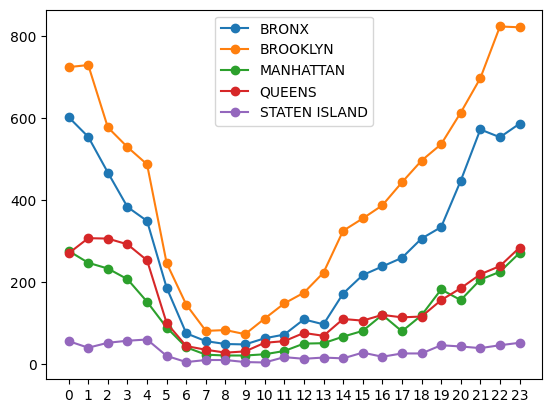

In [33]:
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd['h'] = nypd['DATA'].dt.hour
nypdII = nypd[['DATA','h','BORO','STATISTICAL_MURDER_FLAG']]
nypd_boro = nypdII.groupby('BORO')
boros = nypd_boro.groups.keys()
fig, axis = plt.subplots()
for boro in boros:
    b = nypd_boro.get_group(boro)
    h = b['h'].value_counts().sort_index() # .sort_index(ascending=True)
    axis.plot(h.index.tolist(), h.values.tolist(), label=boro, marker='o')
axis.set_xticks(h.index)
axis.legend(loc='best')
plt.show()

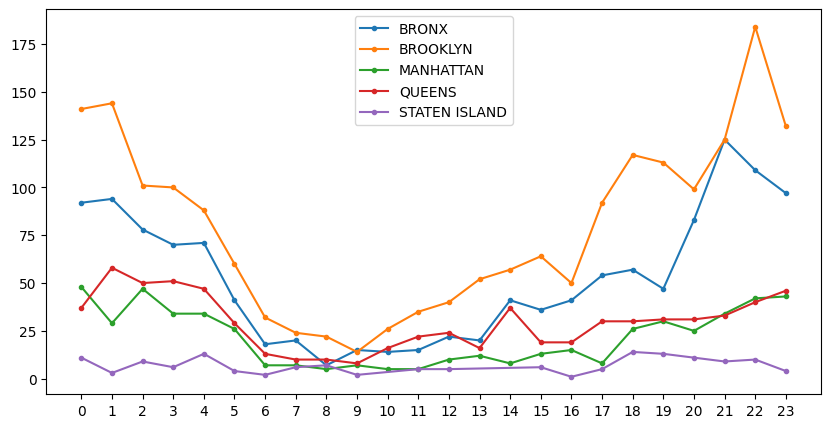

In [59]:
# (^^^ tęsinys ^^^)

# Atvaizduokite grafiką, kuriame būtų tik mirtinų susiškaudymų kiekiai per valandą kiekviename rajone. 
# Panaudokite plot() grafiką.

# nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
# nypd['h'] = nypd['DATA'].dt.hour

nypdII = nypd[['DATA','h','BORO','STATISTICAL_MURDER_FLAG']]
nypd_boro = nypdII.query('STATISTICAL_MURDER_FLAG').groupby('BORO')
boros = nypd_boro.groups.keys()
fig, axis = plt.subplots(figsize=(10,5))
for boro in boros:
    b = nypd_boro.get_group(boro)
    h = b['h'].value_counts().sort_index() # .sort_index(ascending=True)
    axis.plot(h.index.tolist(),h.values.tolist(),label=boro, marker='.')

# axis.set_xticks(h.index) # praleidžia val. etiketes be duomenų paskutiniame grafike
axis.set_xticks(np.arange(0,24)) # Viršutinė riba neįtraukiama į sąrašą.

axis.legend(loc='best')
plt.show()

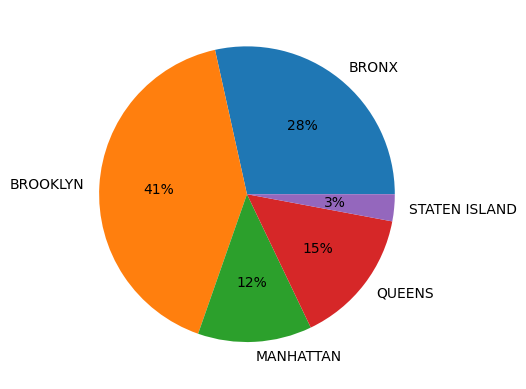

In [42]:
# (^^^ tęsinys ^^^)
# Su pie plot atvaizduokite, kiek mirtinų nusišaudymų tenka kiekvienam rajonui.

e=nypdII['BORO'].value_counts().sort_index()
plt.pie(x=e.values,labels=e.index,autopct='%.0f%%')
plt.show()
# print(e)